In [1]:
import numpy as np
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa
import pyquil.api as api
qvm_connection = api.QVMConnection()

In [2]:
import networkx as nx
import matplotlib.pylab as plt
#import maxcutpy.graphdraw as gd
#import maxcutpy.maxcut as mc
#import maxcutpy.graphcut as gc
#import maxcutpy.graphtest as gt

In [3]:
#square_ring=[(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(7,0),(7,8),(8,9),(9,2),(9,10),(10,11),(11,4),(11,12),(12,6),(0,10),(3,12)]
square_ring=[(0,6),(0,7),(0,8),(0,9),(0,10),(0,11),
(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),
(2,6),(2,7),(2,8),(2,9),(2,10),(2,11),
(3,6),(3,7),(3,8),(3,9),(3,10),(3,11),
(4,6),(4,7),(4,8),(4,9),(4,10),(4,11),
(5,6),(5,7),(5,8),(5,9),(5,10),(5,11)]

In [4]:
steps = 2
inst = maxcut_qaoa(graph=square_ring, steps=steps)
betas, gammas = inst.get_angles()

                     models will be ineffective
	Parameters: [ 2.3459623   2.86462759  2.54031189  2.75712581] 
	E => -21.386994014886593
	Parameters: [ 2.41748555  2.56768449  2.61776043  2.79340379] 
	E => -23.663539417081573
	Parameters: [ 2.51404192  2.67685474  2.72231595  2.71177835] 
	E => -27.233104095139325
	Parameters: [ 2.51404192  2.67685474  2.72231595  2.71177835] 
	E => -23.967712137734008
	Parameters: [ 2.51404192  2.67685474  2.72231595  2.71177835] 
	E => -24.521847004621
	Parameters: [ 2.51404192  2.67685474  2.72231595  2.71177835] 
	E => -24.108913004592118
	Parameters: [ 2.51404192  2.67685474  2.72231595  2.71177835] 
	E => -25.342635618976093
	Parameters: [ 2.51404192  2.67685474  2.72231595  2.71177835] 
	E => -26.331463981028236
	Parameters: [ 2.51404192  2.67685474  2.72231595  2.71177835] 
	E => -25.19807980850704
	Parameters: [ 2.66417786  2.67805732  2.87593481  2.5927944 ] 
	E => -25.548922382983896
	Parameters: [ 2.66417786  2.67805732  2.87593481  2.592

In [5]:
t = np.hstack((betas, gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = qvm_connection.wavefunction(prog)
wf = wf.amplitudes

In [6]:
wlist = []
for state_index in range(2**len(inst.qubits)):
    ww = np.conj(wf[state_index])*wf[state_index]
    wlist.append([inst.states[state_index], ww.real])
    #print(inst.states[state_index], ww.real)

In [7]:
wlist.sort(key=lambda x: float(x[1]),reverse=True)

In [8]:
wlist

[['000000111111', 0.2691721741058043],
 ['111111000000', 0.2691721741058043],
 ['000010111110', 0.0017036967292462365],
 ['111101000001', 0.0017036967292462365],
 ['011111010000', 0.0017036967292462352],
 ['100000101111', 0.0017036967292462352],
 ['000001101111', 0.0017036967292462348],
 ['010000111110', 0.0017036967292462348],
 ['101111000001', 0.0017036967292462348],
 ['111110010000', 0.0017036967292462348],
 ['000100111101', 0.0017036967292462346],
 ['111011000010', 0.0017036967292462346],
 ['000001111110', 0.0017036967292462343],
 ['001000111110', 0.0017036967292462343],
 ['110111000001', 0.0017036967292462343],
 ['111110000001', 0.0017036967292462343],
 ['000010011111', 0.0017036967292462339],
 ['000010111011', 0.0017036967292462339],
 ['011111100000', 0.0017036967292462339],
 ['100000011111', 0.0017036967292462339],
 ['111101000100', 0.0017036967292462339],
 ['111101100000', 0.0017036967292462339],
 ['000010110111', 0.0017036967292462337],
 ['111101001000', 0.0017036967292462337]

In [13]:
for i in range(len(wlist[0][0])-1):
    if wlist[i][0] == '0101010101010':
        print(i,wlist[i][1])

4 0.0126785238119


In [9]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(wlist[0][0])):
    if wlist[0][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

maxcut0 is  [0, 1, 2, 3, 4, 5]
maxcut1 is  [6, 7, 8, 9, 10, 11]


In [32]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(wlist[1][0])):
    if wlist[1][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

maxcut0 is  [6, 7, 8, 9, 10, 11]
maxcut1 is  [0, 1, 2, 3, 4, 5]


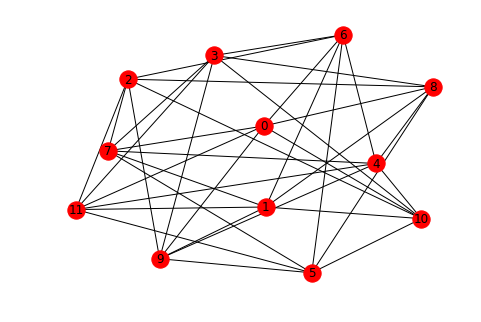

maxcut0 is  [0, 1, 2, 3, 4, 5]
maxcut1 is  [6, 7, 8, 9, 10, 11]


In [11]:
G2 = nx.Graph()
G2.add_edges_from(square_ring)
pos = nx.spring_layout(G2)
#gd.draw_custom(G2,pos)
nx.draw(G2,pos,with_labels=True)
plt.show()
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

In [12]:
import random
random.seed()

In [13]:
seed = random.randrange(1, 1000)
G1 = nx.erdos_renyi_graph(n=12, p=0.3, seed=seed)

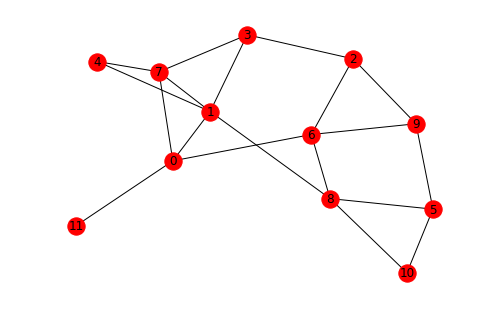

In [14]:
pos = nx.spring_layout(G1)
#gd.draw_custom(G1,pos)
nx.draw(G1,pos,with_labels=True)
plt.show()

In [15]:
inst = maxcut_qaoa(graph=G1, steps=steps)
betas, gammas = inst.get_angles()
t = np.hstack((betas, gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = qvm_connection.wavefunction(prog)
wf = wf.amplitudes

                     models will be ineffective
	Parameters: [ 3.03483469  2.88211884  3.78214206  2.2739959 ] 
	E => -10.838101599093562
	Parameters: [ 3.12736013  2.92004145  3.39009075  2.34332504] 
	E => -11.867369581077709
	Parameters: [ 3.25226949  2.83471557  3.53422726  2.13187116] 
	E => -12.221376808041933
	Parameters: [ 3.30084535  2.80153328  3.50828269  2.26532976] 
	E => -11.877784941708894
	Parameters: [ 3.30084535  2.80153328  3.50828269  2.26532976] 
	E => -11.977332350051809
	Parameters: [ 3.30084535  2.80153328  3.50828269  2.26532976] 
	E => -11.986534790301775
	Parameters: [ 3.30084535  2.80153328  3.50828269  2.26532976] 
	E => -12.227960886850601
	Parameters: [ 3.30084535  2.80153328  3.50828269  2.26532976] 
	E => -12.22801952008387
	Parameters: [ 3.30084535  2.80153328  3.50828269  2.26532976] 
	E => -12.264192027050008
	Parameters: [ 3.30084535  2.80153328  3.50828269  2.26532976] 
	E => -12.26842880744825
	Parameters: [ 3.22982838  2.81774472  3.4468597   2.2

In [16]:
wlist = []
for state_index in range(2**len(inst.qubits)):
    ww = np.conj(wf[state_index])*wf[state_index]
    wlist.append([inst.states[state_index], ww.real])
    #print(inst.states[state_index], ww.real)
wlist.sort(key=lambda x: float(x[1]),reverse=True)

In [17]:
wlist

[['000100111101', 0.0068245502945625432],
 ['111011000010', 0.0068245502945625432],
 ['001100011001', 0.0068204420697918636],
 ['110011100110', 0.0068204420697918636],
 ['011100011001', 0.005716219965038156],
 ['100011100110', 0.005716219965038156],
 ['001100111001', 0.0048120979320872646],
 ['110011000110', 0.0048120979320872646],
 ['000110100101', 0.0040330629037357308],
 ['111001011010', 0.0040330629037357308],
 ['010001111001', 0.0039365918313441972],
 ['101110000110', 0.0039365918313441972],
 ['001100011101', 0.0037908920600291419],
 ['110011100010', 0.0037908920600291419],
 ['011100011101', 0.0037505102978178623],
 ['100011100010', 0.0037505102978178623],
 ['011011000010', 0.0037382770280602867],
 ['100100111101', 0.0037382770280602867],
 ['001110000101', 0.0034963696367498877],
 ['110001111010', 0.0034963696367498877],
 ['010011100110', 0.0034915807468488512],
 ['101100011001', 0.0034915807468488512],
 ['000101111001', 0.0032376321378478185],
 ['111010000110', 0.0032376321378478

In [18]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(wlist[0][0])-1):
    if wlist[0][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

maxcut0 is  [0, 1, 2, 4, 5, 10]
maxcut1 is  [3, 6, 7, 8, 9]
